<a href="https://colab.research.google.com/github/likhon15-4915/Research-Innovation/blob/main/SkinDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 79
CHANNELS = 3

In [7]:
from google.colab import drive
drive.mount('/content/mount')

Drive already mounted at /content/mount; to attempt to forcibly remount, call drive.mount("/content/mount", force_remount=True).


In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/mount/MyDrive/Research and Innovation/Image/skin-disease-datasaet/skinD",
    seed=123,
    shuffle=True,
  image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 1125 files belonging to 8 classes.


In [9]:
class_names =dataset.class_names
class_names

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [10]:
len(dataset)

15

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(79, 256, 256, 3)
[2 1 2 5 6 1 6 7 6 4 0 7 7 0 0 7 6 5 0 4 2 0 7 1 4 0 6 5 6 3 6 0 7 3 5 2 6
 0 4 2 6 5 1 1 7 3 5 4 7 1 2 4 6 7 4 0 4 1 1 0 0 7 5 7 2 4 3 1 3 3 4 2 4 4
 2 3 7 7 6]


In [12]:
len(dataset)

15

In [13]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(79, 256, 256, 3)
[5 6 7 7 2 2 6 2 1 6 0 1 1 2 2 3 3 0 4 7 6 1 1 1 6 4 1 2 5 7 7 2 5 6 4 6 0
 6 7 3 3 0 3 4 7 3 7 0 4 0 7 0 3 1 4 6 5 3 4 0 5 2 6 2 0 0 6 6 6 6 7 7 5 0
 1 1 0 3 4]


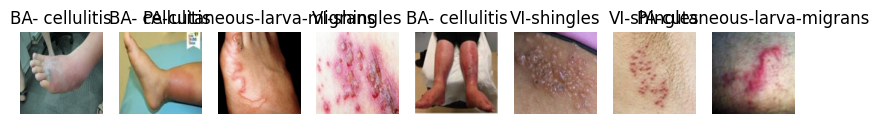

In [14]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(1, 8, i+1)#(6,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [15]:
def get_dataset(ds ,train_split=0.8,val_split=0.1 , test_split=0.1,shuffle=True, shuffle_size =1000):
  assert(train_split+val_split+test_split)==1
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)

  train_size = int(train_split*ds_size)
  val_size = int (val_split*ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [17]:
len(train_ds)

12

In [18]:
len(val_ds)

1

In [19]:
len(test_ds)

2

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
train_ds = train_ds.map(
    lambda x,y: (data_augmentation(x,training=True),y)
).prefetch(buffer_size = tf.data.AUTOTUNE)

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes =8

model = models.Sequential([
resize_and_rescale,
layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64,(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense (64, activation='relu'),
layers.Dense (n_classes, activation='softmax'),

])

model.build(input_shape = input_shape)

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (79, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (79, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (79, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (79, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (79, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (79, 60, 60, 64)         

In [27]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    batch_size =BATCH_SIZE,
    validation_data = val_ds,
    epochs=100
)

Epoch 1/100
12/12 [==============================] - 178s 11s/step - loss: 2.0838 - accuracy: 0.1408 - val_loss: 2.0701 - val_accuracy: 0.1139
Epoch 2/100
12/12 [==============================] - 124s 10s/step - loss: 2.0675 - accuracy: 0.1396 - val_loss: 2.0748 - val_accuracy: 0.1139
Epoch 3/100
12/12 [==============================] - 136s 11s/step - loss: 2.0637 - accuracy: 0.1498 - val_loss: 2.0739 - val_accuracy: 0.1139
Epoch 4/100
12/12 [==============================] - 129s 11s/step - loss: 2.0507 - accuracy: 0.1498 - val_loss: 2.0464 - val_accuracy: 0.1139
Epoch 5/100
12/12 [==============================] - 126s 10s/step - loss: 2.0126 - accuracy: 0.1824 - val_loss: 2.0172 - val_accuracy: 0.1646
Epoch 6/100
12/12 [==============================] - 129s 11s/step - loss: 1.9541 - accuracy: 0.2331 - val_loss: 1.8810 - val_accuracy: 0.2785
Epoch 7/100
12/12 [==============================] - 138s 11s/step - loss: 1.9156 - accuracy: 0.2579 - val_loss: 1.8779 - val_accuracy: 0.2532

In [29]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 14s 4s/step - loss: 0.4654 - accuracy: 0.8671


In [30]:
scores

[0.46539947390556335, 0.8670886158943176]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 12}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
len(history.history['loss'])

100

In [35]:
history.history['loss'][:5]

[2.0838377475738525,
 2.06752872467041,
 2.0636816024780273,
 2.050684928894043,
 2.0125997066497803]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [38]:
# Concatenate labels for training dataset
train_labels = np.concatenate([y.numpy() for x, y in train_ds], axis=0)
print(f"Training labels shape: {train_labels.shape}")

# Concatenate labels for validation dataset
val_labels = np.concatenate([y.numpy() for x, y in val_ds], axis=0)
print(f"Validation labels shape: {val_labels.shape}")

Training labels shape: (888,)
Validation labels shape: (79,)


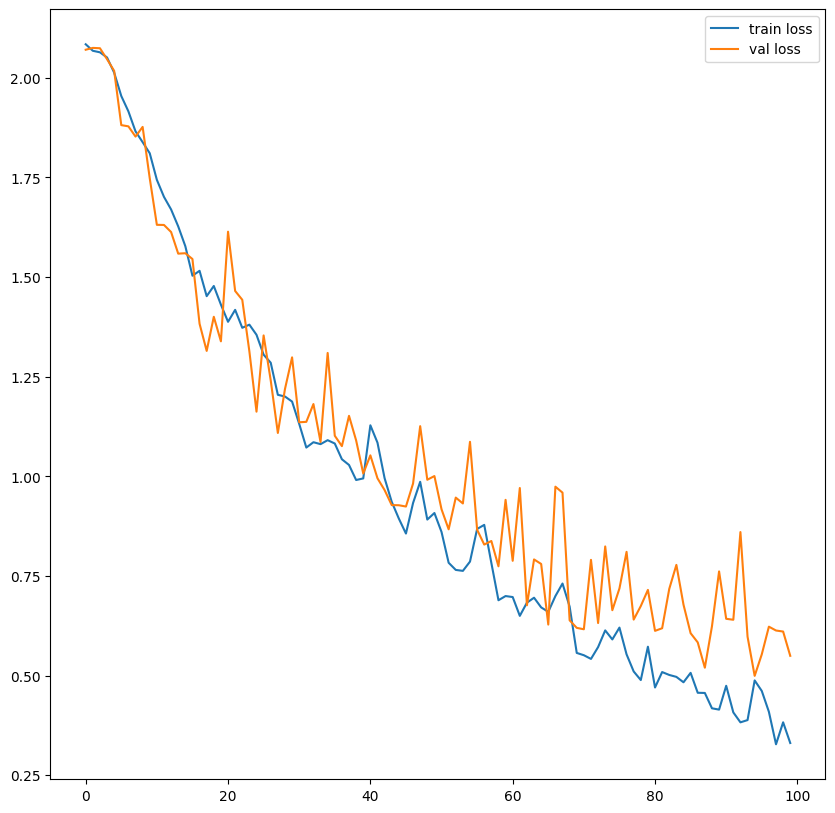

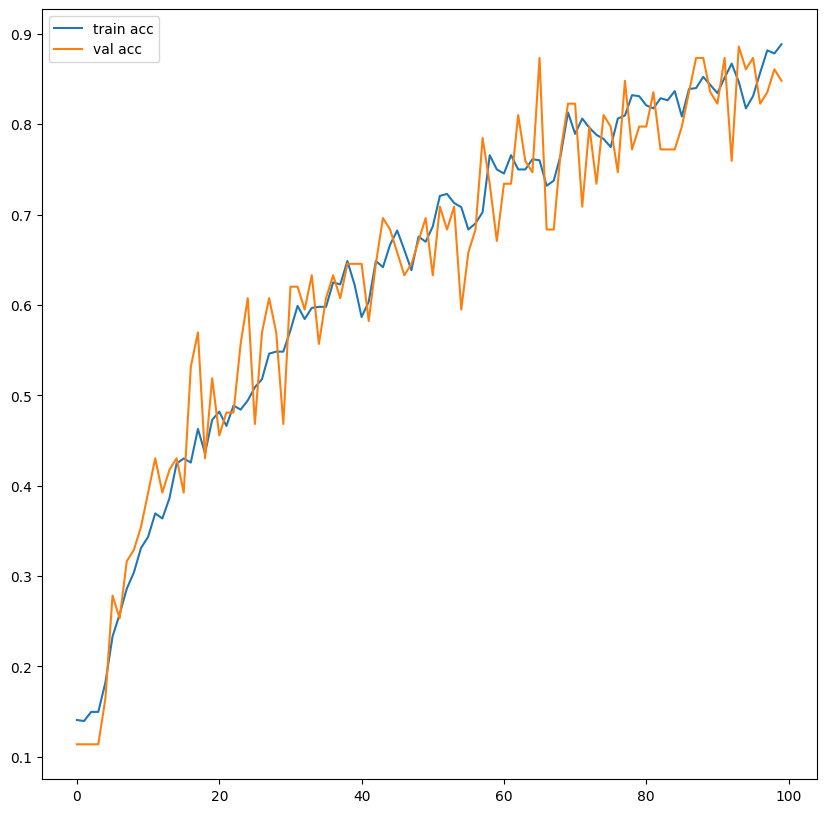

In [39]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

First image to predict
actual label:  PA-cutaneous-larva-migrans
3/3 [==============================] - 3s 785ms/step
predicted label:  PA-cutaneous-larva-migrans


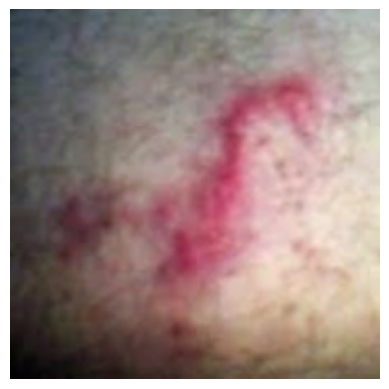

In [40]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("actual label: ",class_names [first_label])


    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [41]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims (img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names [np.argmax (predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


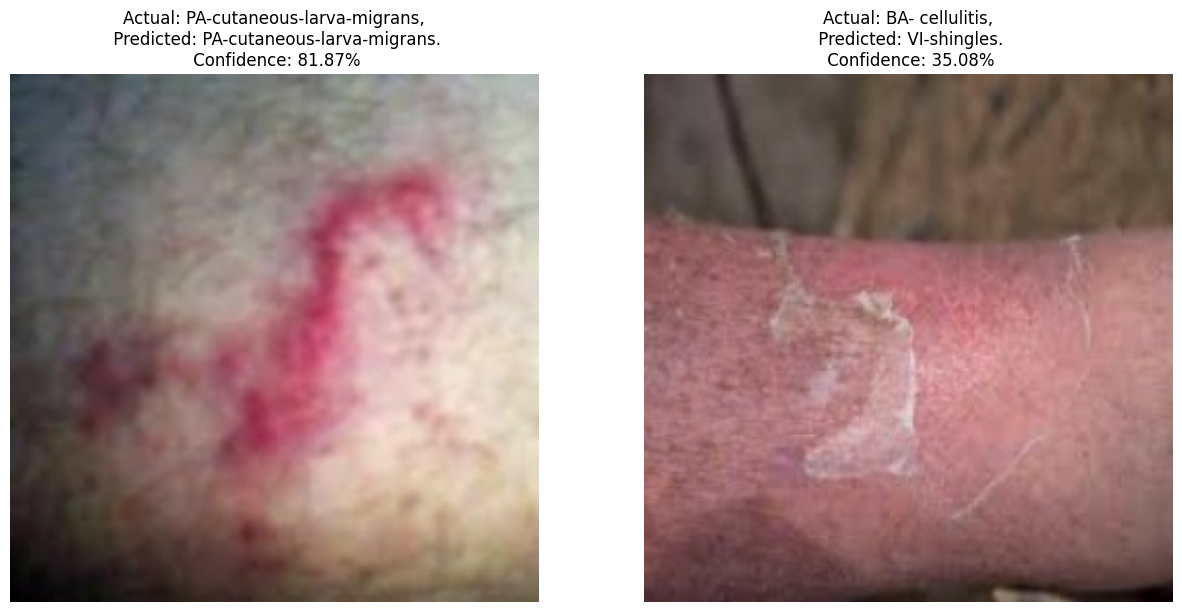

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):

  for i in range(2):

    ax = plt.subplot(1, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict (model, images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")

In [43]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Generate predictions using the model
Y_pred = model.predict(val_ds)

# Get the predicted labels by taking the index of the maximum value along the second axis
y_pred = np.argmax(Y_pred, axis=1)

# Print Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(val_labels, y_pred)
print(cm)

# Print Classification Report
print('Classification Report')
target_names = ['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']
print(classification_report(val_labels, y_pred, target_names=target_names))


1/1 [==============================] - 3s 3s/step
Confusion Matrix
[[11  0  0  1  0  1  0  0]
 [ 0  6  0  1  1  0  0  1]
 [ 1  0 12  0  0  1  0  0]
 [ 0  1  0  7  0  1  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  1  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  1  0  0 14]]
Classification Report
                            precision    recall  f1-score   support

            BA- cellulitis       0.92      0.85      0.88        13
               BA-impetigo       0.75      0.67      0.71         9
           FU-athlete-foot       1.00      0.86      0.92        14
            FU-nail-fungus       0.78      0.78      0.78         9
               FU-ringworm       0.78      1.00      0.88         7
PA-cutaneous-larva-migrans       0.25      0.33      0.29         3
             VI-chickenpox       1.00      1.00      1.00         9
               VI-shingles       0.88      0.93      0.90        15

                  accuracy                           0.85        79
            

1/1 [==============================] - 4s 4s/step
Confusion Matrix
[[11  0  0  1  0  1  0  0]
 [ 0  6  0  1  1  0  0  1]
 [ 1  0 12  0  0  1  0  0]
 [ 0  1  0  7  0  1  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  1  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  1  0  0 14]]


<Figure size 800x600 with 0 Axes>

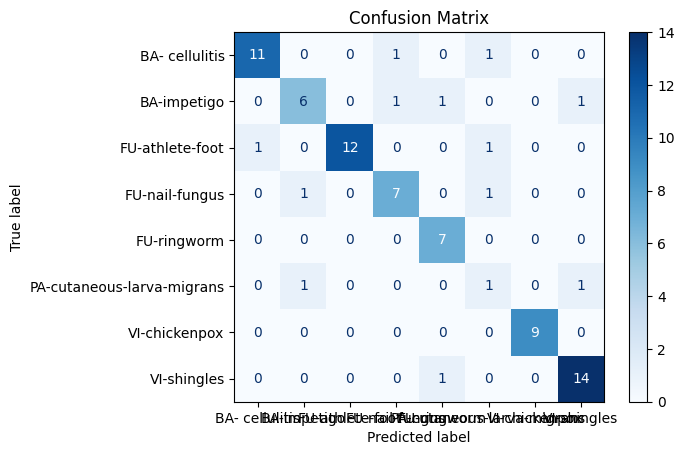

Classification Report
                            precision    recall  f1-score   support

            BA- cellulitis       0.92      0.85      0.88        13
               BA-impetigo       0.75      0.67      0.71         9
           FU-athlete-foot       1.00      0.86      0.92        14
            FU-nail-fungus       0.78      0.78      0.78         9
               FU-ringworm       0.78      1.00      0.88         7
PA-cutaneous-larva-migrans       0.25      0.33      0.29         3
             VI-chickenpox       1.00      1.00      1.00         9
               VI-shingles       0.88      0.93      0.90        15

                  accuracy                           0.85        79
                 macro avg       0.79      0.80      0.79        79
              weighted avg       0.86      0.85      0.85        79



In [44]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions using the model
Y_pred = model.predict(val_ds)

# Get the predicted labels by taking the index of the maximum value along the second axis
y_pred = np.argmax(Y_pred, axis=1)

# Print Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(val_labels, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print('Classification Report')
target_names = ['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']
print(classification_report(val_labels, y_pred, target_names=target_names))
